# Problem Sheet 3



In this problem sheet, you are expected to apply the following methods for a simplified model in finance trading signal classification using the average prices of different period:
- Decision Tree ;
- Bagging ;
- Random Forest ;
- Boost.

#### Suppose Bob is a speculator in the stock market, who would like to try a strategy based on several average prices of different period. We know that 

- Bob does not want to take the long run risk, neither does he want to pay too much commission. As a result, once he is sure to take action, he will open a position and then holding it for 3 days, then close the position.
- Bob wants to focus on simple technical index. He will only analyse the trading signal by using the average prices of different periods.
- Bob only consult the **closed price** of each day.

### Question 1 
- Suppose we are in day n. Write down the formula for 
    - Find a formula for the 7 day average (i.e. the average price of day n-6,n-5,...,n) 
    - Find a function that takes n as input, and output
    
      - 1, if the price on day n+3 is larger than 1.01 times the price on day n, 
      - -1, if the price on day n+3 is less than 0.99 times the price on day n, and
      - 0 otherwise



In [1]:
def AVER_sev(df, n):
    if n < df.date[6]:
        aver = float('nan')
    else:
        m = df.loc[df['date'] == n].index[0]
        aver = df.close[m - 6:m + 1].mean()
    return aver

In [2]:
def STD(df, n):
    m = df.loc[df['date'] == n].index[0]
    r = df.shape[0]
    if m < r - 3:
        if df.close[m + 3] > df.close[m] * 1.01:
            return 1
        if df.close[m + 3] < df.close[m] * 0.99:
            return -1
        else:
            return 0
    else:
        return 0

### Question 2
- Import the S&P500 stocks price datas (all_stocks_5yr.csv) as pandas Dataframe into your notebook, from the source dataset: https://www.kaggle.com/camnugent/sandp500, name this data frame as "sp500".


In [3]:
import pandas as pd

sp500 = pd.read_csv('./all_stocks_5yr.csv')
sp500

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


### Question 3 
Extract the data for Apple. Based on the functions in Question 1,
- For each date n, associate the following **features** :
    - The 5 days averge 
    - The 10 days average 
    - The 15 days average 
    - The 30 days average
    - The 60 days average 
    - The 180 days average 
(Note that for some dates you cannot associate one or some of the averages, if the date is too early)


- For each date n, associate a **label**, based on the comparation of prices in day n and in n+3,

In [4]:
Apple = sp500[sp500['Name'] == 'AAPL'].drop('Name',
                                            axis=1).reset_index(drop=True)
Apple

,date,open,high,low,close,volume
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154
...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838


In [5]:
def AVER_x(df, x, n):
    if n < df.date[x - 1]:
        aver = float('nan')
    else:
        m = df.loc[df['date'] == n].index[0]
        aver = df.close[m - x + 1:m + 1].mean()
    return aver

In [6]:
Apple['AVER_5'] = Apple['date'].apply(lambda n: AVER_x(Apple, 5, n))
Apple['AVER_10'] = Apple['date'].apply(lambda n: AVER_x(Apple, 10, n))
Apple['AVER_15'] = Apple['date'].apply(lambda n: AVER_x(Apple, 15, n))
Apple['AVER_30'] = Apple['date'].apply(lambda n: AVER_x(Apple, 30, n))
Apple['AVER_60'] = Apple['date'].apply(lambda n: AVER_x(Apple, 60, n))
Apple['AVER_180'] = Apple['date'].apply(lambda n: AVER_x(Apple, 180, n))

In [7]:
Apple.head(10)

,date,open,high,low,close,volume,AVER_5,AVER_10,AVER_15,AVER_30,AVER_60,AVER_180
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,67.32592,NaN,NaN,NaN,NaN,NaN
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,66.90250,NaN,NaN,NaN,NaN,NaN
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,66.33278,NaN,NaN,NaN,NaN,NaN
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,65.78850,NaN,NaN,NaN,NaN,NaN
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,65.18994,NaN,NaN,NaN,NaN,NaN
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,64.73910,66.03251,NaN,NaN,NaN,NaN


In [8]:
Apple['label'] = Apple['date'].apply(lambda n: STD(Apple, n))
Apple

,date,open,high,low,close,volume,AVER_5,AVER_10,AVER_15,AVER_30,AVER_60,AVER_180,label
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,67.32592,NaN,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,168.33000,171.948,173.760000,173.409333,172.879167,160.664444,-1
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,166.12800,170.152,172.774667,172.941333,172.650000,160.721389,0
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,163.83400,168.101,171.401333,172.346000,172.344667,160.743333,0
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,163.04600,166.700,170.524000,171.946667,172.124500,160.798722,0


In [15]:
Apple['label'].value_counts()

 1    465
 0    431
-1    363
Name: label, dtype: int64

### Question 4 
Train the decision tree using 
- Gini;
- Entropy. 

and report the decision diagram respectively.

In [9]:
X = Apple[['close','AVER_5','AVER_10','AVER_15','AVER_30','AVER_60','AVER_180']]
y = Apple['label']

In [10]:
import numpy as np
from sklearn.impute import SimpleImputer

X_imput = SimpleImputer().fit_transform(X)
X_imput

array([[ 67.8542    , 109.05125654, 109.02572331, ..., 108.87744054,
        108.657961  , 108.17002759],
       [ 68.5614    , 109.05125654, 109.02572331, ..., 108.87744054,
        108.657961  , 108.17002759],
       [ 66.8428    , 109.05125654, 109.02572331, ..., 108.87744054,
        108.657961  , 108.17002759],
       ...,
       [156.49      , 163.834     , 168.101     , ..., 172.346     ,
        172.34466667, 160.74333333],
       [163.03      , 163.046     , 166.7       , ..., 171.94666667,
        172.1245    , 160.79872222],
       [159.54      , 161.468     , 165.232     , ..., 171.431     ,
        171.85216667, 160.82955556]])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_imput,
                                                    y,
                                                    test_size=0.4,
                                                    random_state=36)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
# Gini

In [13]:
treegini_clf = DecisionTreeClassifier(criterion='gini',
                                      random_state=43)
treegini_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=43)

[Text(198.23353806247113, 212.71304347826086, 'X[2] <= 124.947\ngini = 0.664\nsamples = 755\nvalue = [220, 257, 278]'),
 Text(109.5766879548868, 203.2591304347826, 'X[0] <= 123.725\ngini = 0.659\nsamples = 549\nvalue = [165, 161, 223]'),
 Text(107.92641069056147, 193.80521739130435, 'X[3] <= 61.163\ngini = 0.661\nsamples = 537\nvalue = [165, 161, 211]'),
 Text(45.36328558225509, 184.3513043478261, 'X[5] <= 61.474\ngini = 0.351\nsamples = 24\nvalue = [2, 3, 19]'),
 Text(42.06273105360444, 174.89739130434782, 'X[0] <= 59.462\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(40.41245378927912, 165.44347826086957, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(43.71300831792976, 165.44347826086957, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(48.66384011090573, 174.89739130434782, 'X[1] <= 63.741\ngini = 0.254\nsamples = 21\nvalue = [2, 1, 18]'),
 Text(47.01356284658041, 165.44347826086957, 'X[0] <= 61.459\ngini = 0.185\nsamples = 20\nvalue = [1, 1, 18]'),
 Text(45.36328

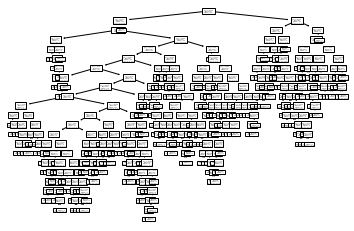

In [14]:
tree.plot_tree(treegini_clf)

In [ ]:
# Entropy

In [15]:
tree_entropy_clf = DecisionTreeClassifier(criterion='entropy',
                                          random_state=43)
tree_entropy_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=43)

[Text(190.94918700132465, 214.0425, 'X[2] <= 124.947\nentropy = 1.578\nsamples = 755\nvalue = [220, 257, 278]'),
 Text(102.40603118781623, 207.2475, 'X[0] <= 123.725\nentropy = 1.568\nsamples = 549\nvalue = [165, 161, 223]'),
 Text(100.6432373333089, 200.4525, 'X[2] <= 60.269\nentropy = 1.574\nsamples = 537\nvalue = [165, 161, 211]'),
 Text(61.508449184765844, 193.6575, 'X[5] <= 61.474\nentropy = 0.567\nsamples = 15\nvalue = [0, 2, 13]'),
 Text(59.74565533025853, 186.8625, 'X[0] <= 59.462\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(57.98286147575122, 180.0675, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(61.508449184765844, 180.0675, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(63.27124303927315, 186.8625, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12]'),
 Text(139.77802548185198, 193.6575, 'X[6] <= 108.135\nentropy = 1.578\nsamples = 522\nvalue = [165, 159, 198]'),
 Text(90.871692353227, 186.8625, 'X[0] <= 115.705\nentropy = 1.567\nsamples = 320\n

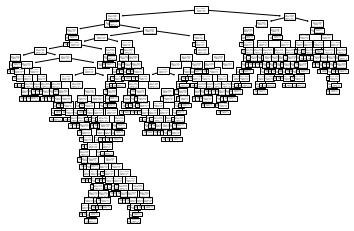

In [16]:
tree.plot_tree(tree_entropy_clf)

### Question 5

Use the bagging to train an ensemble of 500 trees for the same classification problem. Does that improve the prediction?  


In [17]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500,
                            bootstrap=True,
                            random_state=43)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  random_state=43)

In [18]:
for clf in (treegini_clf, tree_entropy_clf, bag_clf):
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, clf.score(X_test, y_test))

DecisionTreeClassifier 0.5734126984126984
DecisionTreeClassifier 0.5575396825396826
BaggingClassifier 0.621031746031746


In [ ]:
# Yes.

### Question 6

Now use the random forest classifier with the number of estimater = 500, report the feature importances. 

In [19]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, random_state=23)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=23)

In [20]:
rnd_clf.score(X_test,y_test)

0.6031746031746031

In [21]:
for name, score in zip(X, rnd_clf.feature_importances_):
    print(name, score)

close 0.15070449462179128
AVER_5 0.14412253455455307
AVER_10 0.141476751604132
AVER_15 0.15390204385651815
AVER_30 0.14134008578327212
AVER_60 0.14019042752502126
AVER_180 0.12826366205471224


### Question 7

Now try the [gradient boost classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) for the same problem.

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier(n_estimators=500,
                                     random_state=33)
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500, random_state=33)

In [23]:
gbc_clf.score(X_test,y_test)

0.6111111111111112

In [24]:
for name, score in zip(X, gbc_clf.feature_importances_):
    print(name, score)

close 0.1683885279354209
AVER_5 0.11880793164779102
AVER_10 0.11333175939841264
AVER_15 0.14449276984178683
AVER_30 0.13504415687207352
AVER_60 0.1325034241714482
AVER_180 0.18743143013306693


### Question 8

Now on day n, using the Gradient boost regessor from the library XGBoost (see p208 of textbook) to predict the price of n+3 by using the same average features as in Question 7.

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(n_estimators=1000,random_state=43)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=1000, random_state=43)

In [28]:
from sklearn.metrics import mean_squared_error
errors = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingRegressor(n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=531)

In [30]:
y_pred=gbrt_best.predict(X_test)
y_pred

array([ 0.23822991, -0.85176799,  0.52767494, -0.73645433, -0.62516095,
        0.35814632, -0.24796008,  0.2242386 , -0.69728359,  0.23340175,
       -0.13441008, -0.01857527, -0.35941363,  0.23089695,  0.62311903,
       -0.99279997,  0.04673394, -0.48760864,  0.6218411 ,  0.0877337 ,
        0.31021525, -0.65731773, -0.70485047, -0.69204089, -0.43715925,
       -0.28663294, -0.09981413, -0.29448412,  0.3070667 ,  0.77517576,
        0.9934689 , -0.99260827,  0.3545217 ,  0.30575517,  0.10152088,
       -0.14006884, -0.41070642, -0.67481533, -0.94979139,  0.80410298,
        0.7344295 ,  0.09697798, -0.45064815,  0.20861244,  0.05780758,
       -0.50619248,  0.1290315 ,  0.10714711, -0.82652799,  0.68270427,
       -0.22950657, -0.33543251,  0.53951249,  0.91816169,  0.15614393,
        0.96397505, -0.4487908 ,  0.93988621,  0.26106643,  0.69089523,
        0.47504587,  0.28717411,  1.0467726 , -0.86385264,  0.56136941,
        0.82865552, -0.25831656,  0.21365404,  0.7059514 ,  0.01

In [32]:
gbrt_best.score(X_test,y_test)

0.25879973187156957